In [8]:
!pip install ultralytics
!pip install roboflow

  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


In [1]:
import ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image 
from IPython import display 
display.clear_output()
from matplotlib import pyplot as plt
import numpy as np
import cv2
import torch

In [9]:
ultralytics.checks()

Ultralytics YOLOv8.2.5 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 375.8/460.4 GB disk)


In [10]:
!yolo checks

Ultralytics YOLOv8.2.5 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 375.8/460.4 GB disk)

OS                  macOS-14.4.1-arm64-arm-64bit
Environment         Darwin
Python              3.12.3
Install             pip
RAM                 8.00 GB
CPU                 Apple M1
CUDA                None

matplotlib          ✅ 3.9.0>=3.3.0
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 10.3.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.32.2>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.3.0>=1.8.0
torchvision         ✅ 0.18.0>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.0
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.2.1>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0


In [1]:
# Dataset created at ROBOFLOW, with 8 classes, with 676 images

from roboflow import Roboflow
rf = Roboflow(api_key="o41GEQLgOtkSkT64I8UA")
project = rf.workspace("eyeshapes").project("eye-shapes")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Eye-Shapes-2 in yolov8:: 100%|██████████| 1364/1364 [00:00<00:00, 2125.56it/s]


In [15]:
#Training the model with YOLO V8, with the biggest model size and 150 epochs
!yolo task=detect mode=train model=yolov8x.pt data={"Eye-Shapes-2/data.yaml"} epochs=150 imgsz=640

Ultralytics YOLOv8.2.28 🚀 Python-3.8.19 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24575MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=Eye-Shapes-2/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,


  0%|          | 0.00/131M [00:00<?, ?B/s]
  5%|▌         | 6.75M/131M [00:00<00:01, 68.0MB/s]
 10%|█         | 13.2M/131M [00:00<00:02, 47.1MB/s]
 14%|█▍        | 18.1M/131M [00:00<00:03, 39.2MB/s]
 17%|█▋        | 22.1M/131M [00:00<00:03, 32.6MB/s]
 20%|█▉        | 25.5M/131M [00:00<00:03, 27.9MB/s]
 22%|██▏       | 28.4M/131M [00:00<00:04, 25.8MB/s]
 24%|██▎       | 31.0M/131M [00:01<00:04, 24.8MB/s]
 26%|██▌       | 33.5M/131M [00:01<00:04, 25.0MB/s]
 28%|██▊       | 36.1M/131M [00:01<00:03, 25.5MB/s]
 30%|██▉       | 38.6M/131M [00:01<00:03, 25.6MB/s]
 32%|███▏      | 41.1M/131M [00:01<00:03, 24.5MB/s]
 33%|███▎      | 43.5M/131M [00:01<00:03, 24.0MB/s]
 35%|███▌      | 46.0M/131M [00:01<00:03, 24.5MB/s]
 37%|███▋      | 48.8M/131M [00:01<00:03, 25.5MB/s]
 40%|███▉      | 51.6M/131M [00:01<00:03, 26.7MB/s]
 42%|████▏     | 54.4M/131M [00:02<00:02, 27.1MB/s]
 44%|████▎     | 57.0M/131M [00:02<00:03, 25.4MB/s]
 46%|████▌     | 59.5M/131M [00:02<00:02, 25.6MB/s]
 48%|████▊     | 62.

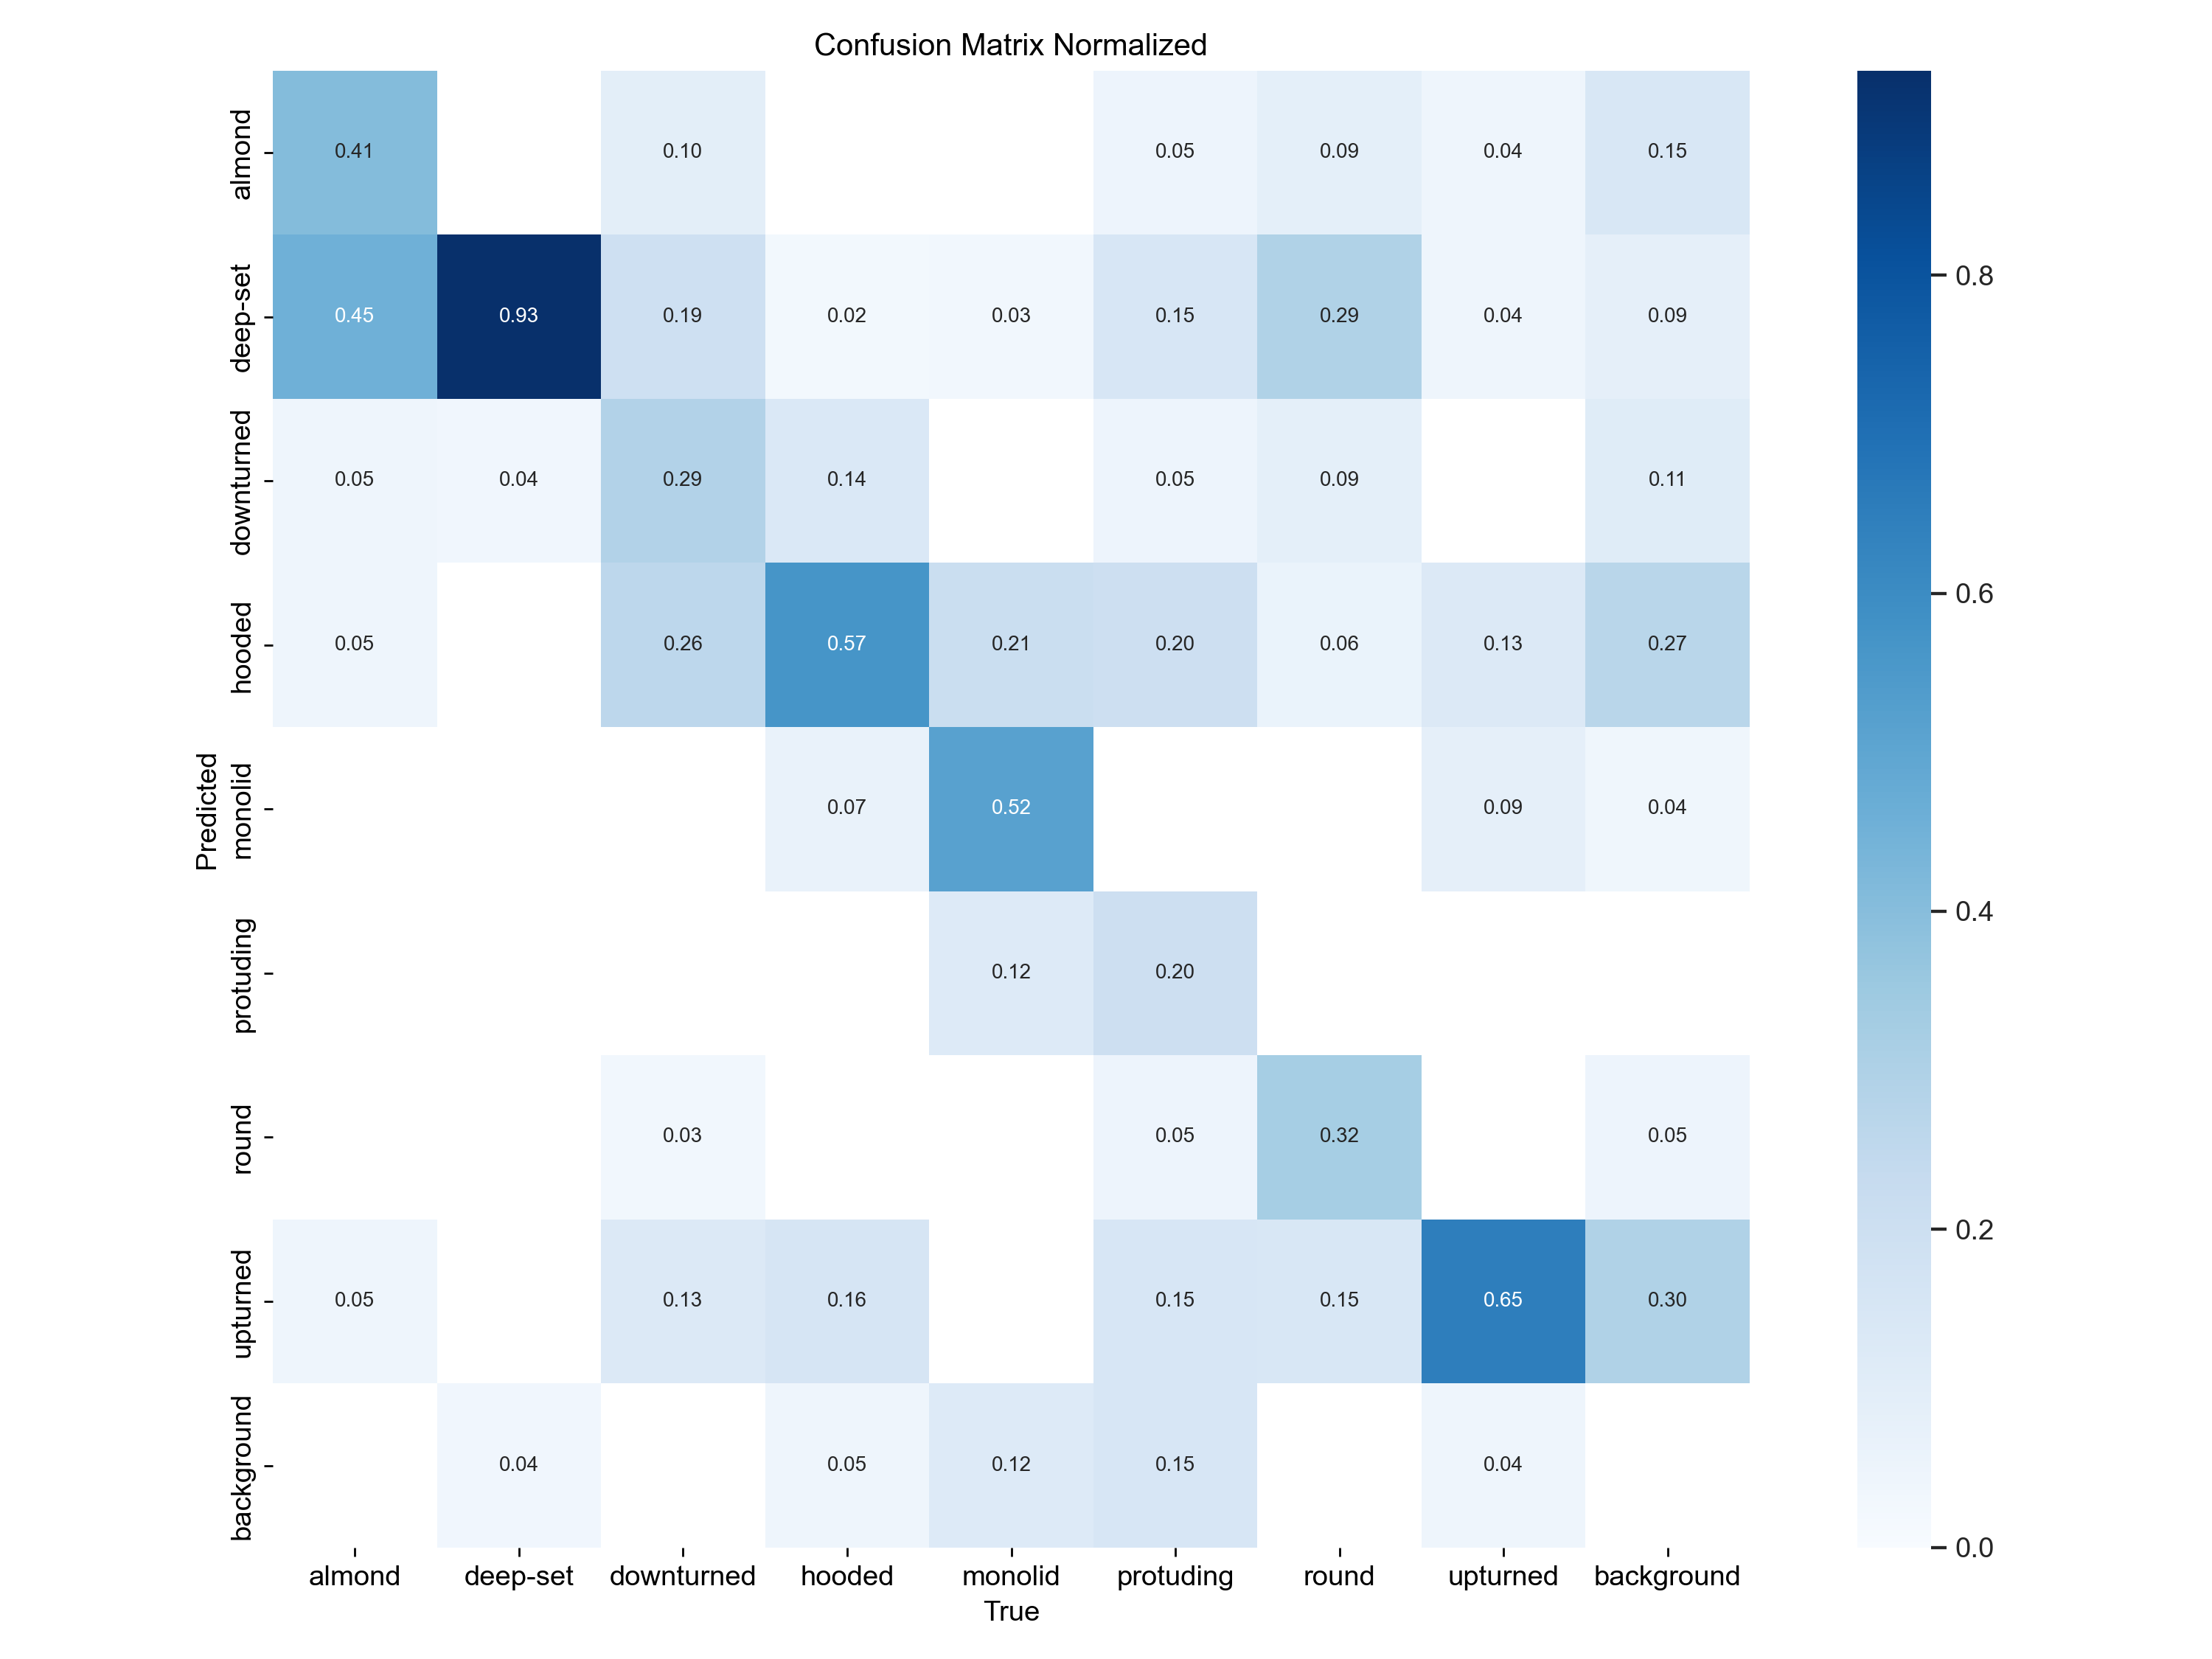

In [3]:

Image(filename="/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_8/Face_Recognition/train9Xobject150/confusion_matrix_normalized.png", width=600)


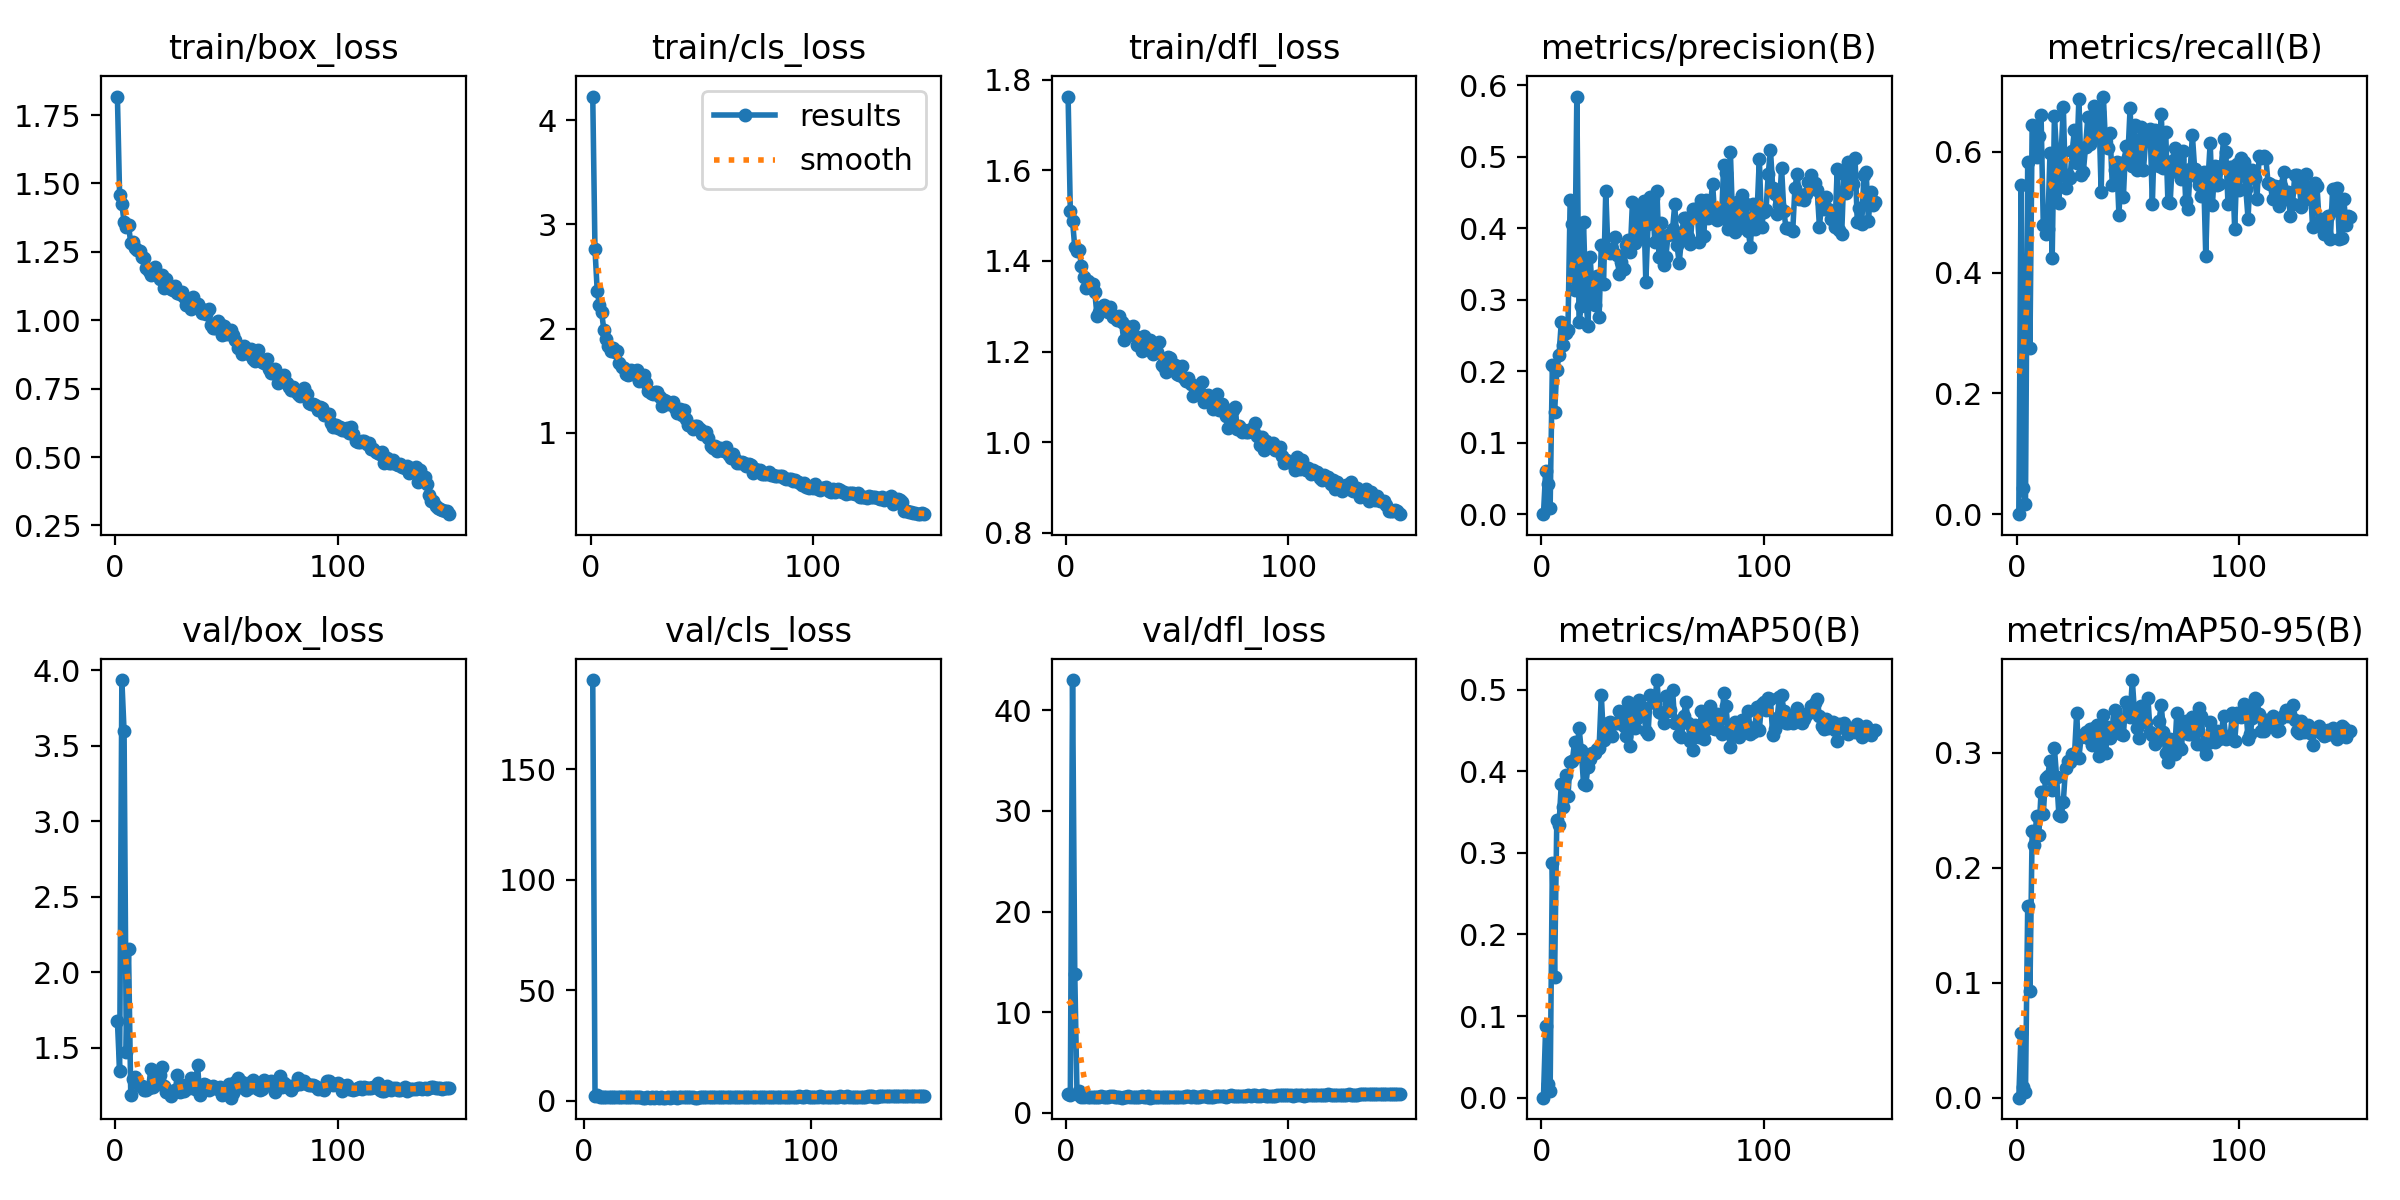

In [4]:
Image(filename=f"/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_8/Face_Recognition/train9Xobject150/results.png", width=600)

In [4]:
# Testing the model with the live camera of the computer. Use Q to exit
# Use cap = cv2.VideoCapture(0) if using Windows

model = YOLO("/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_8/Face_Recognition/train9Xobject150/weights/best.pt")

cap = cv2.VideoCapture(1)
try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        
        results = model(frame)
        
        # Display the results using the plot() method
        cv2.imshow('YOLO', np.squeeze(results[0].plot()))
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    cap.release()
    cv2.destroyAllWindows()

2024-06-17 09:11:57.787 python[78137:7764930] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.



0: 384x640 2 hoodeds, 445.4ms
Speed: 8.5ms preprocess, 445.4ms inference, 717.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 674.9ms
Speed: 2.9ms preprocess, 674.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 381.4ms
Speed: 1.2ms preprocess, 381.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 deep-set, 1 protuding, 373.4ms
Speed: 2.7ms preprocess, 373.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 349.2ms
Speed: 1.4ms preprocess, 349.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 360.5ms
Speed: 1.1ms preprocess, 360.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 338.3ms
Speed: 1.1ms preprocess, 338.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 almond, 1 downturned, 1 hooded, 358.3ms
Speed: 1.2ms preprocess, 35

: 

In [5]:
#Creating a function that make the model run for 7 seconds and get the MODE of results (since the shape varies acording face expressions, makes sense to get some variations and have the most common as result)

from collections import Counter
import time

# Load the YOLO model
model = YOLO("/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_8/Face_Recognition/train9Xobject150/weights/best.pt")
class_names = {0: 'almond', 1: 'deep-set', 2: 'downturned', 3: 'hooded', 4: 'monolid', 5: 'protuding', 6: 'round', 7: 'upturned'}
cap = cv2.VideoCapture(1)
class_labels_accumulated = []  # List to accumulate class labels
start_time = time.time()
try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        # Accumulate the class labels
        class_labels = results[0].boxes.cls
        if class_labels is not None:
            class_labels_accumulated.extend(class_labels.tolist())
        # Break after 5 seconds
        if time.time() - start_time > 7:
            break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break 
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    cap.release()  # Release the camera
    cv2.destroyAllWindows()  
# Find the overall mode of accumulated results
mode_result = Counter(class_labels_accumulated).most_common(1)[0][0]
mode_name = class_names.get(mode_result)
# Display the most common mode
if mode_name is not None:
    print(f"Most common result: {mode_name}")
else:
    print("Unknown mode result.")
# Closes all the frames
cap.release()
cv2.destroyAllWindows() 


0: 384x640 1 deep-set, 1 hooded, 739.9ms
Speed: 12.0ms preprocess, 739.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 2 protudings, 448.4ms
Speed: 1.9ms preprocess, 448.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 1 protuding, 364.8ms
Speed: 1.2ms preprocess, 364.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 deep-set, 1 hooded, 364.1ms
Speed: 1.3ms preprocess, 364.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 1 protuding, 408.6ms
Speed: 2.6ms preprocess, 408.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 almond, 1 hooded, 1 protuding, 351.1ms
Speed: 1.1ms preprocess, 351.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 almond, 1 deep-set, 344.0ms
Speed: 1.3ms preprocess, 344.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



In [11]:
#This show the live camera but it's bugged because the camera will freeze and it's necessary to restart kernel.
# Load the YOLO model
model = YOLO("/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_8/Face_Recognition/train9Xobject150/weights/best.pt")
class_names = {0: 'almond', 1: 'deep-set', 2: 'downturned', 3: 'hooded', 4: 'monolid', 5: 'protuding', 6: 'round', 7: 'upturned'}

cap = cv2.VideoCapture(1)
class_labels_accumulated = []  # List to accumulate class labels
start_time = time.time()
try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        cv2.imshow('YOLO', np.squeeze(results[0].plot()))
        # Accumulate the class labels
        class_labels = results[0].boxes.cls
        if class_labels is not None:
            class_labels_accumulated.extend(class_labels.tolist())
        # Break after 7 seconds
        if time.time() - start_time > 7:
            break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break    
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    cap.release()  # Release the camera
    cv2.destroyAllWindows()  
# Find the overall mode of accumulated results
mode_result = Counter(class_labels_accumulated).most_common(1)[0][0]
mode_name = class_names.get(mode_result)
# Display the most common mode
if mode_name is not None:
    print(f"Most common Mode of results: {mode_name}")
else:
    print("Unknown mode result.")
# Closes all the frames
cap.release()
cv2.destroyAllWindows() 


0: 384x640 1 hooded, 2 protudings, 515.7ms
Speed: 8.5ms preprocess, 515.7ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 almond, 1 hooded, 1 protuding, 618.8ms
Speed: 5.1ms preprocess, 618.8ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 1 protuding, 462.7ms
Speed: 6.8ms preprocess, 462.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 1 hooded, 1 protuding, 398.5ms
Speed: 0.9ms preprocess, 398.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 1 hooded, 332.5ms
Speed: 1.1ms preprocess, 332.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 almond, 1 hooded, 1 upturned, 324.6ms
Speed: 1.1ms preprocess, 324.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 almonds, 347.3ms
Speed: 1.1ms preprocess, 347.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384,

: 

In [3]:
# Testing the model with an uploaded image

from IPython.display import display, Image 
from IPython import display 
display.clear_output()
from PIL import Image

model = YOLO("/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_8/Face_Recognition/train9Xobject150/weights/best.pt")

# Define the path to your image
image_path = "/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_9/Women to test/a_Imagem5.jpg"
#image_path = "/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/MAKEUP STUDIO/CURSO ONLINE/Exemplos Curso EYE SHAPE/Cobertos/Camille Wrong.jpg"
image = Image.open(image_path)
image = np.array(image)
image_rgb = image[:, :, ::-1]
results = model(image_rgb)

# Visualize the detection results
results[0].show()


0: 640x640 1 hooded, 693.1ms
Speed: 9.8ms preprocess, 693.1ms inference, 517.6ms postprocess per image at shape (1, 3, 640, 640)



0: 640x480 1 protuding, 550.1ms
Speed: 1.7ms preprocess, 550.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


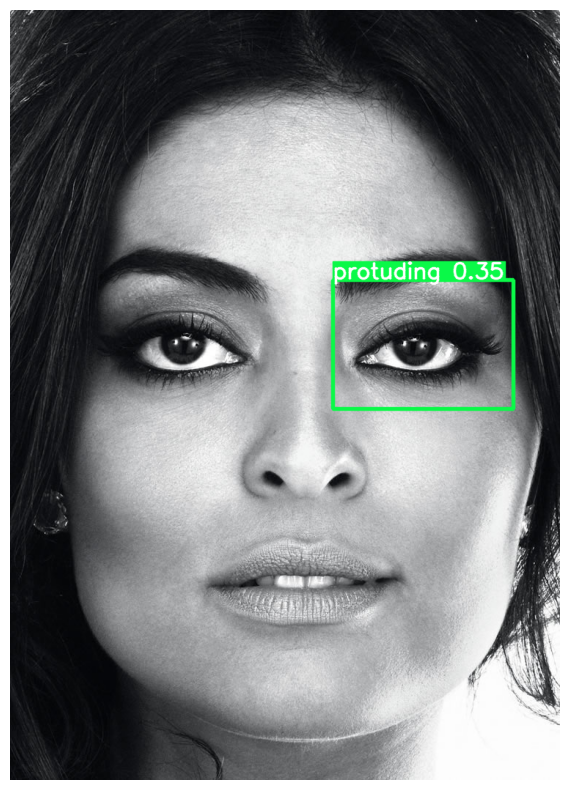

In [8]:
# Testing the model with an uploaded image

from IPython.display import display, clear_output
from PIL import Image

# Clear any previous outputs
clear_output()

# Load your model
model = YOLO("/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_8/Face_Recognition/train9Xobject150/weights/best.pt")

# Define the path to your image
image_path = "/Users/belluscher/Library/CloudStorage/OneDrive-Pessoal/A_IRONHACK/Week_9/Women to test/a_juliana-paes.jpg"

# Open the image
image = Image.open(image_path)
image = np.array(image)

# Run the model on the image
results = model(image)

# Render the results on the image
result_img = results[0].plot()

# Display the image with detections inline
plt.figure(figsize=(10, 10))
plt.imshow(result_img)
plt.axis('off')
plt.show()


In [ ]:
# STREAMLIT Picture Upload (working)

if option == "Upload a photo":
    uploaded_file = st.file_uploader("Upload to discover your EYE SHAPE", type=["jpg", "jpeg", "png"])
    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        image = np.array(image)

        # Run the model on the image
        results = model(image)

        # Render the results on the image
        result_img = results[0].plot()
        st.image(result_img, caption='Uploaded Image', use_column_width=True)
        if st.session_state.prediction is None:
            st.session_state.prediction = get_prediction(image)

In [ ]:
# STREAMLIT Live Camera (working but not showing image)
else:
    if st.session_state.prediction is None:
        cap = cv2.VideoCapture(1)
        class_labels_accumulated = []
        start_time = time.time()
        try:
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                results = model(frame)
                class_labels = results[0].boxes.cls
                if class_labels is not None:
                    class_labels_accumulated.extend(class_labels.tolist())
                if time.time() - start_time > 7:
                    break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
        finally:
            cap.release()
            cv2.destroyAllWindows()
            if class_labels_accumulated:
                mode_result = Counter(class_labels_accumulated).most_common(1)[0][0]
                st.session_state.prediction = class_names.get(mode_result)

In [ ]:
#STREAMLITE Youtube Library

if st.session_state.prediction:
    st.write(f"Predicted Eye Shape: {st.session_state.prediction}")
    if st.button("See the suggested Makeup Tutorials"):
        if st.session_state.prediction == 'protuding':
            st.write("Makeup for PROTRUDING eyes")
            st.write("Makeup by Saz")
            st_player("https://www.youtube.com/watch?v=UPnGfCs6IgE")
            st.write("Sam Young")
            st_player("https://www.youtube.com/watch?v=XkEq9TqpOXA&t=2s")
            st.write("Advise My Style")
            st_player("https://www.youtube.com/watch?v=UPnGfCs6IgE")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@deniebaker/video/7338674948375989535")
        elif st.session_state.prediction == 'hooded':
            st.write("Makeup for HOODED eyes")
            st.write("Michaella")
            st_player("https://www.youtube.com/watch?v=AWOlM4qkoDg")
            st.write("Risa Does Makeup")
            st_player("https://www.youtube.com/watch?v=u4XZi7IGfB4")
            st.write("Brittany Nichole")
            st_player("https://www.youtube.com/watch?v=kHnAS4NJuWU&list=PL0ajLoeF4OjrulRIyQXhQMJidgK2xbiYX")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@smithadepak/video/7245282054827511082?q=hooded&t=1718639557478")
        elif st.session_state.prediction == 'almond':
            st.write("Makeup for ALMOND eyes")
            st.write("Melissa Van Dijk")
            st_player("https://www.youtube.com/watch?v=QROq6116tAk")
            st.write("Jean Watts")
            st_player("https://www.youtube.com/watch?v=JPUbSvsxjsY&list=PLkjw3goLraSrg1CFmwgFf2le4kU6xMrPN")
            st.write("Leah Halton")
            st_player("https://www.youtube.com/watch?v=02xfgtxL9RA")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@simplystephjaye/video/7233469235463294251?q=almond%20eyes&t=1718639676274")
        elif st.session_state.prediction == 'deep-set':
            st.write("Makeup for DEEP_SET eyes")
            st.write("Hung Vanngo")
            st_player("https://www.youtube.com/watch?v=ntJwR5VInxw")
            st.write("Bobbi Brown Cosmetics")
            st_player("https://www.youtube.com/watch?v=Rysc1Iw2V3k")
            st.write("Danielle Donnelly")
            st_player("https://www.youtube.com/watch?v=mpZo-0JuBTA")
            st.write("Ali Andreea")
            st_player("https://www.youtube.com/watch?v=E1JsJEObDM4")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@aliandreeamakeup/video/7286446908254604576?q=deep-set%20eyes&t=1718640652837")
        elif st.session_state.prediction == 'downturned':
            st.write("Makeup for DOWNTURNED eyes")
            st.write("Risa Does Makeup")
            st_player("https://www.youtube.com/watch?v=K6uUE9md19g")
            st.write("Jen Phelps")
            st_player("https://www.youtube.com/shorts/JP7p_ud-ZRc")
            st.write("Makeup and Art Freak")
            st_player("https://www.youtube.com/watch?v=5CjhSxVBA2U")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@juliarosemondbeauty/video/7162657687874882862?q=downturned%20eyes%20makeup&t=1718641308737")
        elif st.session_state.prediction == 'monolid':
            st.write("Makeup for MONOLID eyes")
            st.write("Jenny Moon")
            st_player("https://www.youtube.com/shorts/YwNjlXHoiyE")
            st.write("Fenty Beauty")
            st_player("https://www.youtube.com/watch?v=QWZl5ujH8uE")
            st.write("Elaine Park")
            st_player("https://www.youtube.com/watch?v=wWTnS89NutM")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@heysandylin/video/7107748509905980715?q=monolid%20eyes%20makeup&t=1718641770468")
        elif st.session_state.prediction == 'round':
            st.write("Makeup for ROUND eyes")
            st.write("Mallory Osses")
            st_player("https://www.youtube.com/watch?v=8XCpevgyStc")
            st.write("Raluca Makeup")
            st_player("https://www.youtube.com/watch?v=Bqv7b-J9iIo")
            st.write("Raluca Makeup")
            st_player("https://www.youtube.com/watch?v=umyd2cjXWPI")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@cleangirlhacks/video/7220973171996921134?q=round%20eyes&t=1718641152746")
        elif st.session_state.prediction == 'upturned':
            st.write("Makeup for UPTURNED eyes")
            st.write("Ariana Grande")
            st_player("https://www.youtube.com/watch?v=MdLcP8dJls4")
            st.write("Rachel OCool")
            st_player("https://www.youtube.com/watch?v=Fjnew2Maq20")
            st.write("Advise My Style")
            st_player("https://www.youtube.com/watch?v=d6exsQPLK_U")
            st.write("TikTok")
            st_player("https://www.tiktok.com/@makeupxmargot/video/7207052608874302725?q=upturned%20eye%20makeup&t=1718641882736")
        else:
            st.write("We're still building the makeup Library. Hang on!")

